# ASNA HACKATHON 2025

### IMPORT FILES

In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE

import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

### Load & Prepare Data

In [108]:
df = pd.read_csv('./Data/train.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7290 entries, 0 to 7289
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     7290 non-null   object 
 1   State                          7290 non-null   object 
 2   Customer Lifetime Value        7290 non-null   float64
 3   Response                       7290 non-null   object 
 4   Coverage                       7290 non-null   object 
 5   Coverage Index                 7290 non-null   int64  
 6   Education                      7290 non-null   object 
 7   Education Index                7290 non-null   int64  
 8   Effective To Date              7290 non-null   object 
 9   Employment Status              7290 non-null   object 
 10  Employment Status Index        7290 non-null   int64  
 11  Gender                         7290 non-null   object 
 12  Income                         7290 non-null   i

,CustomerID,State,Customer Lifetime Value,Response,Coverage,Coverage Index,Education,Education Index,Effective To Date,Employment Status,...,Policy Type,Policy Type Index,Policy,Policy Index,Renew Offer Type,Sales Channel,Sales Channel Index,Vehicle Size,Vehicle Size Index,Claim over 1k
0,QC35222,California,3622.69,No,Basic,0,Bachelor,2,1/1/2024,Employed,...,Corporate Auto,1,Corporate L2,4,3,Web,0,Medsize,1,0
1,AE98193,Washington,10610.21,No,Basic,0,High School or Below,0,1/1/2024,Unemployed,...,Personal Auto,0,Personal L1,0,1,Branch,1,Medsize,1,1
2,TM23514,Oregon,13868.02,No,Extended,1,College,1,1/1/2024,Employed,...,Personal Auto,0,Personal L3,2,3,Web,0,Medsize,1,0
3,QZ42725,Washington,3119.69,No,Basic,0,Bachelor,2,1/1/2024,Unemployed,...,Personal Auto,0,Personal L3,2,2,Agent,2,Medsize,1,0
4,SG81493,Arizona,5999.04,No,Premium,2,Bachelor,2,1/1/2024,Employed,...,Corporate Auto,1,Corporate L1,3,2,Web,0,Medsize,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7285,HC90344,California,27500.54,No,Basic,0,Bachelor,2,9/2/2024,Unemployed,...,Corporate Auto,1,Corporate L2,4,1,Branch,1,Medsize,1,0
7286,ZU83252,California,11750.03,No,Basic,0,Master,3,9/2/2024,Employed,...,Personal Auto,0,Personal L3,2,3,Web,0,Medsize,1,0
7287,PR80703,California,7757.04,No,Basic,0,Bachelor,2,9/2/2024,Employed,...,Personal Auto,0,Personal L3,2,1,Branch,1,Medsize,1,0
7288,NS23754,California,3465.16,No,Basic,0,High School or Below,0,9/2/2024,Employed,...,Corporate Auto,1,Corporate L3,5,3,Call Center,3,Large,2,0


In [126]:
columns_drop = ['Claim over 1k', 'CustomerID']
X = df.drop(columns=columns_drop, axis=1)

for column in X.columns:
    if X[column].isnull().any():
        print(f'Column ''{column}'' contains NaN value(s)')

le = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = le.fit_transform(X[column])

X

,State,Customer Lifetime Value,Response,Coverage,Coverage Index,Education,Education Index,Effective To Date,Employment Status,Employment Status Index,...,Number of Policies,Policy Type,Policy Type Index,Policy,Policy Index,Renew Offer Type,Sales Channel,Sales Channel Index,Vehicle Size,Vehicle Size Index
0,1,3622.69,0,0,0,0,2,0,1,1,...,1,0,1,1,4,3,3,0,1,1
1,4,10610.21,0,0,0,3,0,0,4,0,...,7,1,0,3,0,1,1,1,1,1
2,3,13868.02,0,1,1,1,1,0,1,1,...,3,1,0,5,2,3,3,0,1,1
3,4,3119.69,0,0,0,0,2,0,4,0,...,1,1,0,5,2,2,0,2,1,1
4,0,5999.04,0,2,2,0,2,0,1,1,...,1,0,1,0,3,2,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7285,1,27500.54,0,0,0,0,2,58,4,0,...,2,0,1,1,4,1,1,1,1,1
7286,1,11750.03,0,0,0,4,3,58,1,1,...,2,1,0,5,2,3,3,0,1,1
7287,1,7757.04,0,0,0,0,2,58,1,1,...,9,1,0,5,2,1,1,1,1,1
7288,1,3465.16,0,0,0,3,0,58,1,1,...,1,0,1,2,5,3,2,3,0,2


In [127]:
y = df['Claim over 1k']
y

0       0
1       1
2       0
3       0
4       0
       ..
7285    0
7286    0
7287    0
7288    0
7289    0
Name: Claim over 1k, Length: 7290, dtype: int64

### Feature Estimates

In [130]:
# Random Forest

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=100)
model.fit(X_train, y_train)

importances = model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

print("Feature Importances:")
for i in indices:
    print(f"{features[i]}: {importances[i]:.4f}")

Feature Importances:
Customer Lifetime Value: 0.1642
Months Since Policy Inception: 0.0778
Number of Policies: 0.0765
Income: 0.0701
Effective To Date: 0.0677
Months Since Last Claim: 0.0662
Coverage: 0.0385
Marital Status Index: 0.0336
Coverage Index: 0.0333
State: 0.0304
Marital Status: 0.0301
Employment Status Index: 0.0296
Employment Status: 0.0263
Renew Offer Type: 0.0263
Policy Index: 0.0257
Policy: 0.0249
Sales Channel Index: 0.0229
Education: 0.0223
Education Index: 0.0218
Sales Channel: 0.0218
Number of Open Complaints: 0.0204
Vehicle Size Index: 0.0168
Gender: 0.0148
Vehicle Size: 0.0143
Response: 0.0097
Policy Type: 0.0073
Policy Type Index: 0.0067


In [131]:
# Permutation Feature Importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=100, random_state=100)
features = X_train.columns

print("Permutation Feature Importances (Mean Importance):")
for i in np.argsort(perm_importance.importances_mean)[::-1]:
    print(f"{features[i]}: {perm_importance.importances_mean[i]:.4f}")

Permutation Feature Importances (Mean Importance):
Customer Lifetime Value: 0.0318
Number of Policies: 0.0191
Income: 0.0102
Marital Status Index: 0.0101
Coverage: 0.0089
Marital Status: 0.0076
Coverage Index: 0.0063
Employment Status: 0.0060
Employment Status Index: 0.0055
Gender: 0.0039
State: 0.0029
Months Since Last Claim: 0.0027
Effective To Date: 0.0026
Policy: 0.0018
Response: 0.0017
Education: 0.0014
Policy Type Index: 0.0009
Education Index: 0.0009
Renew Offer Type: 0.0008
Number of Open Complaints: 0.0008
Months Since Policy Inception: 0.0008
Policy Index: 0.0007
Policy Type: 0.0005
Sales Channel Index: 0.0004
Vehicle Size Index: 0.0004
Sales Channel: 0.0001
Vehicle Size: -0.0009


In [136]:
# SHapley Additive exPlanations
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

shap_values



array([[[ 4.23573940e-03, -4.23573940e-03],
        [ 8.67740426e-02, -8.67740426e-02],
        [-2.24215791e-03,  2.24215791e-03],
        ...,
        [ 4.92958079e-03, -4.92958079e-03],
        [ 2.37948458e-03, -2.37948458e-03],
        [ 2.21493191e-03, -2.21493191e-03]],

       [[ 9.98307299e-03, -9.98307299e-03],
        [-1.03129432e-01,  1.03129432e-01],
        [ 7.04542158e-05, -7.04542158e-05],
        ...,
        [-1.58528977e-03,  1.58528977e-03],
        [-8.88511766e-03,  8.88511766e-03],
        [-2.55234272e-03,  2.55234272e-03]],

       [[ 9.49436651e-05, -9.49436651e-05],
        [ 3.77404492e-02, -3.77404492e-02],
        [ 9.03115092e-04, -9.03115092e-04],
        ...,
        [-3.06750013e-04,  3.06750013e-04],
        [-4.60155033e-03,  4.60155033e-03],
        [-1.24175965e-04,  1.24175965e-04]],

       ...,

       [[-2.88300032e-04,  2.88300032e-04],
        [-5.70559944e-02,  5.70559944e-02],
        [-2.44572053e-03,  2.44572053e-03],
        ...,
     

### Train Data

In [84]:
X = df_train
y = y_fields

le = LabelEncoder()
for column in ['CustomerID', 'State', 'Response', 'Coverage', 'Education', 'Effective To Date', 'Employment Status', 'Gender', 'Marital Status', 'Policy Type', 'Policy', 'Sales Channel', 'Vehicle Size']:
    X[column] = le.fit_transform(X[column].astype(str))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
num_classes = np.unique(y_train).size

2

In [87]:
model_size_class = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=50,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    )

model_size_class.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [89]:
y_pred = model_size_class.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

### Confusion Matrix

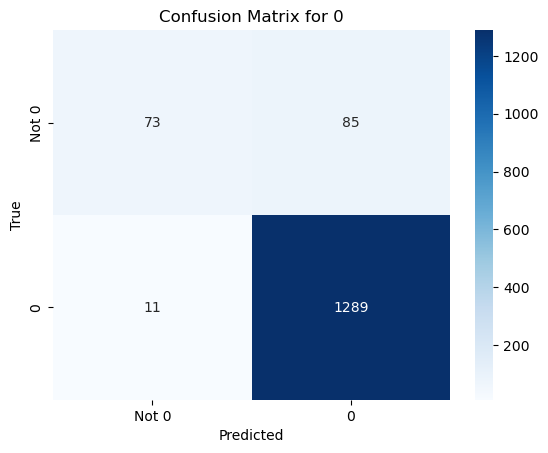

Metrics for 0:
POD (Probability of Detection): 0.99
POFD (Probability of False Detection): 0.54
PSS (Peirce Skill Score): 0.45
Accuracy: 0.93




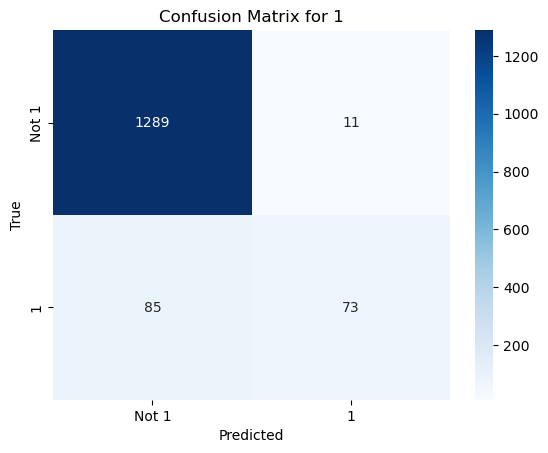

Metrics for 1:
POD (Probability of Detection): 0.46
POFD (Probability of False Detection): 0.01
PSS (Peirce Skill Score): 0.45
Accuracy: 0.93


Overall Accuracy: 0.93


In [103]:
cm = confusion_matrix(y_test, y_pred)

class_labels = le.inverse_transform(range(len(cm)))

def calculate_metrics(cm):
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    pod = tp / (tp + fn) if (tp + fn) else 0  # Probability of Detection
    pofd = fp / (fp + tn) if (fp + tn) else 0  # Probability of False Detection
    pss = pod - pofd  # Peirce Skill Score
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) else 0  # Accuracy
    return pod, pofd, pss, accuracy

for i, label in enumerate(class_labels):
    # Construct a binary confusion matrix for the current category
    tp = cm[i, i]
    fn = np.sum(cm[i, :]) - tp
    fp = np.sum(cm[:, i]) - tp
    tn = np.sum(cm) - (fp + fn + tp)
    binary_cm = np.array([[tn, fp], [fn, tp]])

    pod, pofd, pss, accuracy = calculate_metrics(binary_cm)

    # Plot binary confusion matrix
    sns.heatmap(binary_cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Not ' + label, label],
                yticklabels=['Not ' + label, label])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {label}')
    plt.show()

    # Display metrics
    print(f"Metrics for {label}:")
    print(f"POD (Probability of Detection): {pod:.2f}")
    print(f"POFD (Probability of False Detection): {pofd:.2f}")
    print(f"PSS (Peirce Skill Score): {pss:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print("\n")
    
# Calculate overall accuracy from the combined confusion matrix
overall_accuracy = np.trace(cm) / np.sum(cm) if np.sum(cm) else 0

# Display overall accuracy
print(f"Overall Accuracy: {overall_accuracy:.2f}")